In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [2]:
#1.1 

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index = labels)
df


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [3]:
#1.2.1
df[df['visits']>=3]

#1.2.2
print(df[df['visits']>=3]['animal'].unique())

['cat' 'dog']


In [4]:
#1.3 Select the rows where visits are 3 and the animal is a cat
df[(df['visits']==3) & (df['animal']=='cat')]



,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [5]:
#1.4 Calculate the sum of all visits in df (i.e. the total number of visits).
df['visits'].sum()

19

In [6]:
#1.5 Calculate the mean age for each different animal in df.
df.groupby('animal').mean()[['age']]

,age
animal,
cat,2.5
dog,5.0
snake,2.5


In [7]:
#1.6 Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original 
#DataFrame.

dft = pd.DataFrame({'animal': 'panda', 'age': 5 , 'visits':2, 'priority':'yes'}, index = ['k'])
df = df.append(dft)
print(df)
print('\n')
df = df.drop(index = 'k')
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k  panda  5.0       2      yes


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [8]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
dft = df.shift(1)
df = df.where(df['A']!=dft['A']).dropna().reset_index(drop= True)
df 

,A
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [9]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df.apply(np.sum, axis=0))
col_smallest_sum = df.apply(np.sum, axis=0).idxmin()
print(f'The column with the smallest sum is {col_smallest_sum}.')

a    3.590116
b    2.610623
c    3.051565
d    2.527181
e    3.208873
f    1.935812
g    2.869887
h    1.613384
i    1.945527
j    1.416208
dtype: float64
The column with the smallest sum is j.


# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [10]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
len(df[~df.duplicated()])

7

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [11]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df.groupby('grps')['vals'].apply(lambda x: x.nlargest(3)).groupby('grps').sum()

grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [12]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [13]:
df[['From','To']] = df['From_To'].str.split("_",expand=True)
df


,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [14]:
def clean(string):
    chars_to_remove = '123456789(!)<>.""'
    for char in chars_to_remove:
        string = string.replace(char, '')
    return string

df['From'] = df['From'].apply(lambda x: x.title())
df['To'] = df['To'].apply(lambda x: x.title())
df['Airline'] = df['Airline'].apply(clean)

df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM,London,Paris
1,MAdrid_miLAN,10055,[],Air France,Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,Budapest_PaRis,10075,[13],Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [15]:
df = pd.read_csv('data/country_total.csv')
df[['year', 'month']] = df['month'].astype(str).str.split('.', expand = True)
df[['year', 'month']] = df[['year', 'month']].astype(int)
df

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1,171000,4.5,1993
1,at,nsa,2,175000,4.6,1993
2,at,nsa,3,166000,4.4,1993
3,at,nsa,4,157000,4.1,1993
4,at,nsa,5,147000,3.9,1993
...,...,...,...,...,...,...
20791,uk,trend,6,2429000,7.7,2010
20792,uk,trend,7,2422000,7.7,2010
20793,uk,trend,8,2429000,7.7,2010
20794,uk,trend,9,2447000,7.8,2010


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [16]:
df = pd.read_csv('data/country_sex_age.csv')
df

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
0,at,nsa,f,y25-74,1993.01,61000,4.5
1,at,nsa,f,y25-74,1993.02,62000,4.5
2,at,nsa,f,y25-74,1993.03,62000,4.5
3,at,nsa,f,y25-74,1993.04,63000,4.6
4,at,nsa,f,y25-74,1993.05,63000,4.6
...,...,...,...,...,...,...,...
83155,uk,trend,m,y_lt25,2010.06,518000,21.1
83156,uk,trend,m,y_lt25,2010.07,513000,20.8
83157,uk,trend,m,y_lt25,2010.08,509000,20.5
83158,uk,trend,m,y_lt25,2010.09,513000,20.7


In [17]:
#4.2.1
df.groupby(['seasonality', 'sex']).mean()[['unemployment_rate']]

unemployment_rate
seasonality sex                   
nsa         f            13.179216
            m            11.708432
sa          f            12.908743
            m            11.662290
trend       f            12.862163
            m            11.643015

In [18]:
#4.2.2
df.groupby(['seasonality', 'age_group']).mean()[['unemployment_rate']]

unemployment_rate
seasonality age_group                   
nsa         y25-74              6.870746
            y_lt25             18.016902
sa          y25-74              6.918446
            y_lt25             17.690707
trend       y25-74              6.926319
            y_lt25             17.617224

In [19]:
#4.2.3
df.groupby(['seasonality','sex','age_group']).mean()[['unemployment_rate']]


unemployment_rate
seasonality sex age_group                   
nsa         f   y25-74              7.539839
                y_lt25             18.818593
            m   y25-74              6.201653
                y_lt25             17.215211
sa          f   y25-74              7.579982
                y_lt25             18.323837
            m   y25-74              6.256909
                y_lt25             17.067671
trend       f   y25-74              7.579934
                y_lt25             18.231025
            m   y25-74              6.272703
                y_lt25             17.013327

In [20]:
#4.2.4 The seasonality column makes it such that the data is repeated for each method of calculating unemployment 
#(nsa, trend, etc.). Can you ignore this and group over it? Or should you take the average for each?

#To distinguish the difference between each method of calculating unemployment, it would be preferable to find the average
#for each method.

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

4.3.1 : Give an estimate of the total population for men and women in each age group.

4.3.2 : Does this change depending on the unemployment seasonality calculation method?

In [21]:
df = pd.read_csv('data/country_sex_age.csv')
df['population'] = df['unemployment']/df['unemployment_rate']*100
df_total_pop = df.groupby(['seasonality', 'age_group', 'sex']).mean()['population']
print('4.3.1\n')
print(df_total_pop)

4.3.1

seasonality  age_group  sex
nsa          y25-74     f      3.006779e+06
                        m      4.110194e+06
             y_lt25     f      5.270112e+05
                        m      6.354751e+05
sa           y25-74     f      3.360649e+06
                        m      4.533201e+06
             y_lt25     f      5.876348e+05
                        m      6.867673e+05
trend        y25-74     f      3.289520e+06
                        m      4.423824e+06
             y_lt25     f      5.848969e+05
                        m      6.809973e+05
Name: population, dtype: float64


In [22]:
print('\n4.3.2\n')
print('The total population does seem to vary according to the unemployment seasonality calculation. For the example below,\
 the percent difference between calculations can go up to almost 12%.')
df_total_pop = df_total_pop.reset_index(level=[0,1]).reset_index()
df_y25_f = df_total_pop[(df_total_pop['age_group']=='y25-74') & (df_total_pop['sex']=='f')].reset_index(drop= True)
df_y25_f.iloc[0]['population']
df_y25_f['percent_diff'] =(df_y25_f['population']-df_y25_f.iloc[0]['population'])/df_y25_f.iloc[0]['population']*100
df_y25_f



4.3.2

The total population does seem to vary according to the unemployment seasonality calculation. For the example below, the percent difference between calculations can go up to almost 12%.


,sex,seasonality,age_group,population,percent_diff
0,f,nsa,y25-74,3.006779e+06,0.000000
1,f,sa,y25-74,3.360649e+06,11.769092
2,f,trend,y25-74,3.289520e+06,9.403469


# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [23]:
df = pd.read_csv('data/tennis.csv')
df =df[~df.duplicated()]
games_won = df['win'].sum()
games_loss = len(df)-games_won
win_loss_ratio = games_won/games_loss
top_5 = (df.groupby('player2 name').count()
                                   .sort_values('year', ascending = False)
                                   .drop(labels = 'N/A Bye')
                                   .head(5))
top_5['Number of matches'] = top_5[['year']]


print(f'5.1.1 Federer won {games_won} games.')
print(f"5.1.2 Federer's win/loss ratio is {win_loss_ratio}.")
print(f"5.1.3 Federer's top 5 players: ")
top_5[['Number of matches']]


5.1.1 Federer won 972 games.
5.1.2 Federer's win/loss ratio is 4.695652173913044.
5.1.3 Federer's top 5 players: 


,Number of matches
player2 name,
Novak Djokovic,29
Rafael Nadal,28
Lleyton Hewitt,26
Andy Roddick,24
Andy Murray,19


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [24]:
df = pd.read_csv('data/tennis.csv')
df= df[df['tournament prize money'].notna()]
df['tournament prize money'] = (df['tournament prize money'].astype(str)
                                                            .str.replace('$', '')
                                                            .str.replace(r'[A-Z]', '')
                                                            .str.replace(',',''))
df['tournament prize money'] = df['tournament prize money'].where(df['tournament prize money'] != '')
df = df[df['tournament prize money'].notna()]
df['tournament prize money'] = df['tournament prize money'].astype(int)
best_year_money = df[(df['win']==True) & (df['tournament round']=='F')].groupby('year')['tournament prize money'].sum().idxmax()

print(f"Answer 5.2.1.a : Federer's best year in terms of money was in {best_year_money}.")

Answer 5.2.1.a : Federer's best year in terms of money was in 2007.


In [25]:
best_year_win = df.groupby('year')['win'].sum().idxmax()
print(f"Answer 5.2.1.b : Federer's best year in terms of number of wins was in {best_year_win}.")


Answer 5.2.1.b : Federer's best year in terms of number of wins was in 2006.


Answer 5.2.2: 

Federer's performance got better from 1998 to 2006 which was his best year.In 2007, his performance dropped to the one around 2003/2004 and then was relatively steady until 2012.


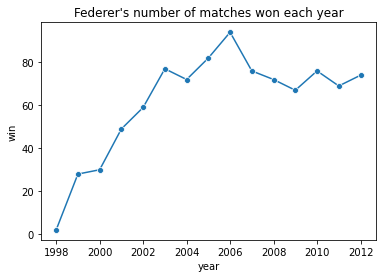

In [26]:
df_year = df.groupby('year').sum()
ax = sns.lineplot(data = df_year, x = df_year.index,  y= 'win', marker = 'o' )
ax.set_title("Federer's number of matches won each year")
print(f"Answer 5.2.2: \n\nFederer's performance got better from 1998 to 2006 which was his best year.\
In 2007, his performance dropped to the one around 2003/2004 and then was relatively steady until 2012.")


# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [27]:
total_money = df[(df['win']==True) & (df['tournament round']=='F')]['tournament prize money'].sum()

In [28]:
print(f'Federer won {total_money}$.')

Federer won 44934964$.
